# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [110]:
import os, sys, time

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import word_tokenize, wordpunct_tokenize


from nltk.corpus import words


from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD 

import spacy

import pandas as pd
import numpy as np


from nltk.corpus import stopwords


from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV



from nltk.tokenize import RegexpTokenizer


import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px


from pandarallel import pandarallel

pandarallel.initialize()

!pip install sklearn

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
nltk.download('omw-1.4')
nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to /home/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1.3 Loading data

In [3]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['df.csv']

In [4]:
# load dataframe

fn = data + 'df.csv'

df = pd.read_csv(fn)

In [5]:
df.head()

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


# 5. Working with text SEPARATE NOTEBOOK

##  5.1 10 random texts 

In [6]:
df.sample(10)

,text,target,_len_txt
7408,California cops have sketch of gunman who kill...,1,117
2627,How American war planners singled out Hiroshim...,1,86
4498,Bluedio Turbine Hurricane H Bluetooth 4.1 Wire...,0,139
1732,OMG OMG OMG #JustinBieber and #HarryStyles hav...,0,132
968,Check out Vintage Longaberger Floral Fabric Sh...,0,116
5104,Fukushima 'mutant vegetable' images sweep acro...,1,131
3165,@chowtaxis of Newport a big thanks for the eme...,1,120
2513,I rated The Hobbit: The Desolation of Smaug (2...,0,85
3866,@selmoooooo @_edvinnn @imTariik @dzafic_haris ...,1,124
6679,Random wind gust just came through #Gander. P...,1,139


In [7]:
df_samp = df.sample(20)
df_samp

,text,target,_len_txt
1352,Ali you flew planes and ran into burning build...,0,115
1700,My 2 fav worlds have collided! Thanks to @lenn...,0,139
6976,@Eric_Tsunami worry about yourself,0,34
13,#Flood in Bago Myanmar #We arrived Bago,1,39
23,What a wonderful day!,0,21
6185,'If you looking for my niggas you can follow t...,0,62
2891,We all carry these things inside that no one e...,0,115
454,Horrific attack on wife by muslim in Italy htt...,1,80
325,Vladimir Putin Issues Major Warning But Is It ...,1,99
789,@todd_calfee so @mattburgener wanted to see th...,1,69


In [29]:
for idx, ser in df_samp.iterrows(): 

    txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
    print(txt_1+ser['text']+ "..." + "\n\n")

target : 0, len : 115
Ali you flew planes and ran into burning buildings why are you making soup for that man child?! #BooRadleyVanCullen...


target : 0, len : 139
My 2 fav worlds have collided! Thanks to @lennonparham @Jessica_StClair I found the @GilmoreGuysShow podcast!! #ihave44episodesofGG #nojoke...


target : 0, len : 34
@Eric_Tsunami worry about yourself...


target : 1, len : 39
#Flood in Bago Myanmar #We arrived Bago...


target : 0, len : 21
What a wonderful day!...


target : 0, len : 62
'If you looking for my niggas you can follow the sirens.' ????...


target : 0, len : 115
We all carry these things inside that no one else can see. They hold us down like anchors they drown us out at sea....


target : 1, len : 80
Horrific attack on wife by muslim in Italy http://t.co/nY3l1oRZQb LiveLeak #News...


target : 1, len : 99
Vladimir Putin Issues Major Warning But Is It Too Late To Escape Armageddon?
http://t.co/gBxafy1m1C...


target : 1, len : 69
@todd_calfee so @mattburgener

In [30]:
def print_sample(sub_df, n_samp=10) : 
    """ """
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
        print(txt_1+ser['text']+ "..." + "\n\n")

In [31]:
df_1 = df[df.target==1]
df_1.head()

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [32]:
print_sample(df_1)

target : 1, len : 81
Turkish troops killed in Kurdish militant 'suicide attack' http://t.co/7old5MJWph...


target : 1, len : 139
Coming later this year~ 'THE MAN THAT TATTOOED WOMEN.' A novel based on a real serial killer from #Arkansas &amp; a natural disaster. #NOLA...


target : 1, len : 120
[Tropical Cyclone Info] SOUDELOR 945hPa maximum wind speed: 45m/s maximum wind gust speed: 60m/s  http://t.co/nBD5oT9iEW...


target : 1, len : 120
//./../.. Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/fqSk7QCawO -/...


target : 1, len : 97
#Tweet4Taiji is a dolphin worship group based on superstitions! Just take a look at their tweets!...


target : 1, len : 137
UNR issues Severe Thunderstorm Warning [wind: 60 MPH hail: 0.75 IN] for Weston [WY] and Custer Fall River Lawrence Meade Pennington [SÛ_...


target : 1, len : 111
As California fires rage the Forest Service sounds the alarm about rising wildfire costs http://t.co/Tft1bb4xaZ...


t

In [33]:
print_sample(df[df.target==0])

target : 0, len : 92
Heard theres two more deaths and a murder chrissie kills adam?  val and finn die? #emmerdale...


target : 0, len : 27
@paddytomlinson1 ARMAGEDDON...


target : 0, len : 7
Bad day...


target : 0, len : 136
#golf McIlroy fuels PGA speculation after video: Injured world number one Rory McIlroy fueled speculatio... http://t.co/dCyYJVmXHR #news...


target : 0, len : 136
One of these candidates is going to have a Frank Grimes level meltdown with how voters love Trump no matter what. http://t.co/pBEgOf4740...


target : 0, len : 45
Casualty Roleplay somebody please am so bored...


target : 0, len : 130
I added a video to a @YouTube playlist http://t.co/O7QOgmOegU S@X 109 - SWS | Fatality (Captain Falcon) Vs. Snow (Fox) SSB4 Losers...


target : 0, len : 119
#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/nQiObcZKrT #prebreak #best...


target : 0, len : 137
Reddit's new content policy goes into effect many horrible subreddi

# work on One

In [34]:
txt = df.text.sample(1)
txt = txt.values[0]
txt

'Weather forecast for Thailand  A Whirlwind is coming ...2 september https://t.co/rUKjYjG9oQ'

In [35]:
txt = txt.lower()
txt

'weather forecast for thailand  a whirlwind is coming ...2 september https://t.co/rukjyjg9oq'

In [36]:
txt = txt.strip().replace("  ", " ")
txt

'weather forecast for thailand a whirlwind is coming ...2 september https://t.co/rukjyjg9oq'

In [41]:
raw_tokens_list  = word_tokenize(txt)
raw_tokens_list[:30]

['weather',
 'forecast',
 'for',
 'thailand',
 'a',
 'whirlwind',
 'is',
 'coming',
 '...',
 '2',
 'september',
 'https',
 ':',
 '//t.co/rukjyjg9oq']

In [42]:
len(raw_tokens_list)

14

In [43]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'being', 'she', 'where', 'more', 'shan', 'no', 'once', 'o', 'from', 'out', 'didn', 'himself', 'themselves', 'mightn', 'shouldn', 'be', 'i', "don't", 'how', 'll', 'ain', 'other', "you'd", 'while', 'just', 'until', 'then', 'do', 'now', 'am', 'because', 'nor', 'our', 'wouldn', 't', 'the', 'wasn', "you're", 'haven', 'me', 'with', 'ma', "hadn't", 'doing', "needn't", 'aren', 'you', 'have', 'them', 'yourselves', 'off', 'under', "won't", 'did', 'can', "hasn't", 'doesn', 'hadn', "that'll", 'y', 'it', "should've", 'needn', 'same', "shouldn't", 'isn', 're', 'by', 'this', "haven't", 'my', "mustn't", 'about', 'there', 'some', 'all', 'won', 'in', "weren't", 'against', 'very', "wouldn't", "you've", 'will', 'whom', "you'll", 'as', "aren't", "isn't", 'further', 'don', 'these', 'its', 'should', 'those', 'which', 'between', 'herself', "couldn't", 'if', 'not', 'or', 'own', 'an', 'and', 'during', 'too', 'yours', 'your', 'such', 'm', "mightn't", 'are', "it's", 'down', 'having', 'theirs', 'here', 'so', 'but

In [44]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
cleaned_tokens_list[:50]

['weather',
 'forecast',
 'thailand',
 'whirlwind',
 'coming',
 '...',
 '2',
 'september',
 'https',
 ':',
 '//t.co/rukjyjg9oq']

In [45]:
len(cleaned_tokens_list)

11

In [46]:
tokenizer = RegexpTokenizer(r"\w+")
raw_tokens_list = tokenizer.tokenize(txt)
raw_tokens_list[:50]

['weather',
 'forecast',
 'for',
 'thailand',
 'a',
 'whirlwind',
 'is',
 'coming',
 '2',
 'september',
 'https',
 't',
 'co',
 'rukjyjg9oq']

In [48]:
len(raw_tokens_list)

14

In [49]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [50]:
cleaned_tokens_list[:50]

['weather',
 'forecast',
 'thailand',
 'whirlwind',
 'coming',
 '2',
 'september',
 'https',
 'co',
 'rukjyjg9oq']

In [51]:
len(cleaned_tokens_list)

10

In [52]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [53]:
corpus = list(df.text.values)
corpus[:3]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]

In [54]:
corpus = "".join(corpus)
corpus[:5000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [55]:
cleaned_corpus = process_text(corpus)
cleaned_corpus

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [56]:
len(cleaned_corpus)

83858

In [61]:
tmp = pd.Series(cleaned_corpus).value_counts()
tmp

co             4740
http           4263
https           408
amp             344
like            343
               ... 
appalling         1
businessmen       1
jlwhaowfqa        1
saveti            1
ymy4rskq3d        1
Length: 22486, dtype: int64

<AxesSubplot:>

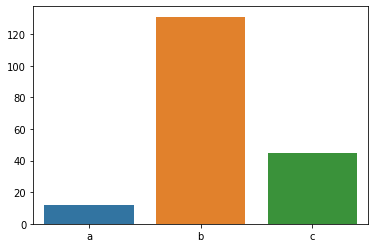

In [60]:
ser = pd.Series({"a":12, "b":131, "c" :45})
sns.barplot(x=ser.index, y=ser.values)

In [59]:
sns.barplot(x=tmp.index, y=tmp.values)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f4a44f53550> (for post_execute):


KeyboardInterrupt: 

In [62]:
tmp.head(30)

co           4740
http         4263
https         408
amp           344
like          343
û_            297
fire          234
get           226
via           219
2             204
people        194
new           183
one           181
news          167
disaster      148
emergency     146
video         138
would         135
body          127
police        123
still         121
3             120
burning       119
crash         117
u             117
us            115
storm         114
back          113
know          113
day           112
dtype: int64

In [63]:
tmp.tail(30)

sweated                1
drying                 1
gqpi7jmkan             1
sharethissouth         1
92                     1
88                     1
17000                  1
drrichardbesser        1
columbus               1
n8ezfctfcemichael      1
rowysolouisville       1
hxvfmouhdm             1
steveycheese99         1
mapmyrun               1
stung                  1
x6asgrjswcgot          1
transgender            1
mwlippert              1
southkorea             1
electrocutedboiling    1
waterfur               1
3a50dhz7yijust         1
50ft                   1
hairdryer              1
earths_voice           1
appalling              1
businessmen            1
jlwhaowfqa             1
saveti                 1
ymy4rskq3d             1
dtype: int64

In [64]:
len(df)

7613

In [65]:
tmp.describe()

count    22486.000000
mean         3.729343
std         43.687675
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4740.000000
dtype: float64

In [66]:
sns.displot(tmp)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4a44f53550> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.boxplot(tmp)

In [175]:
# sns.countplot(pd.Series(cleaned_corpus))

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

Error in callback <function flush_figures at 0x7f9b4f8db790> (for post_execute):


KeyboardInterrupt: 

In [67]:
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

x9cuihib5nfinnish    1
creatures            1
nukes                1
ys3nmwwyvc           1
pact                 1
stunckle             1
alpotnb7q3japan      1
restart              1
navygermany          1
40mln                1
construct            1
willie_am_i          1
0dxvz7fdh3a          1
cataclysmic          1
gpvzv0249yus         1
e9d9lk5fdwnuclear    1
promised             1
sy2whxt0k5           1
frkodestuknavy       1
rt_america           1
xkurdr3yevnuclear    1
melts                1
subsd                1
indo                 1
xn09mx6sxy           1
businessus           1
d8awx2okke           1
justthebottle        1
sizewell             1
reator               1
dtype: int64

In [68]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['x9cuihib5nfinnish',
 'creatures',
 'nukes',
 'ys3nmwwyvc',
 'pact',
 'stunckle',
 'alpotnb7q3japan',
 'restart',
 'navygermany',
 '40mln',
 'construct',
 'willie_am_i',
 '0dxvz7fdh3a',
 'cataclysmic',
 'gpvzv0249yus',
 'e9d9lk5fdwnuclear',
 'promised',
 'sy2whxt0k5',
 'frkodestuknavy',
 'rt_america',
 'xkurdr3yevnuclear',
 'melts',
 'subsd',
 'indo',
 'xn09mx6sxy',
 'businessus',
 'd8awx2okke',
 'justthebottle',
 'sizewell',
 'reator']

In [69]:
def process_text(txt, rejoin=False) : 
    
    # lower
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # classics stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # no unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # 3 more len words
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    # only alpha chars
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # manage return type
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [70]:
cleaned_corpus[:100]

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [71]:
len(set(cleaned_corpus))

22486

'car'

21288

In [72]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    """global text processing function"""
    
    # lower and strip
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word > 3
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [73]:
df["clean_text"] = df.text.apply(lambda i : process_text(i))

In [74]:
df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [75]:
df.clean_text

0                      deed reason earthquak allah forgiv
1                                 forest fire near canada
2       resid ask shelter place offic evacu shelter pl...
3             peopl receiv wildfir evacu order california
4                  sent photo alaska smoke wildfir school
                              ...                        
7608      giant crane hold bridg collaps nearbi home http
7609    thetawniest control wild fire california even ...
7610                                  volcano hawaii http
7611    polic investig bike collid littl portug bike r...
7612    latest home raze northern california wildfir n...
Name: clean_text, Length: 7613, dtype: object

In [116]:
tf = TfidfVectorizer()
X = tf.fit_transform(df.clean_text)
X

<7613x5176 sparse matrix of type '<class 'numpy.float64'>'
	with 53222 stored elements in Compressed Sparse Row format>

In [117]:
X = X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
tf.get_feature_names_out()

array(['aannnnd', 'aashiqui', 'abandon', ..., 'ûïwe', 'ûïwhen', 'ûïyou'],
      dtype=object)

In [119]:
X = pd.DataFrame(X, columns=tf.get_feature_names_out())
X

,aannnnd,aashiqui,abandon,abbott,abbruchsimul,abbswinston,abcnew,abia,abil,abl,...,ûªll,ûªre,ûªve,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
len(tf.get_feature_names_out())

5176

In [121]:
X

,aannnnd,aashiqui,abandon,abbott,abbruchsimul,abbswinston,abcnew,abia,abil,abl,...,ûªll,ûªre,ûªve,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
pca = PCA()
X_pca = pca.fit_transform(X)

KeyboardInterrupt: 

In [ ]:
pca.explained_variance_ratio_

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
len(cumsum)

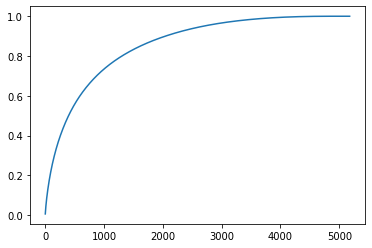

In [95]:
plt.plot(range(1, len(cumsum)+1), cumsum)

In [98]:
X_pca = X_pca[:, :1000]

In [99]:
X_pca.shape

(7613, 800)

In [100]:
X_train = pd.DataFrame(X_pca)
y_train = df.target

In [101]:
estimator = RandomForestClassifier()
param_grid = {}
cv = 10

In [102]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={})

In [103]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res

In [104]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score
0,35.213131,6.852969,0.05958,0.017401,{},0.663606,0.056981,1


In [108]:
grid.best_estimator_.feature_importances_

array([0.02379448, 0.01234724, 0.01208949, 0.01117866, 0.00575285,
       0.00377014, 0.00834019, 0.00669237, 0.00344477, 0.00511978,
       0.00514736, 0.00655219, 0.00843549, 0.00607813, 0.00928024,
       0.00328269, 0.00864676, 0.00359412, 0.0026001 , 0.00944199,
       0.00375315, 0.00338615, 0.00497267, 0.00312458, 0.00153848,
       0.00422666, 0.00251376, 0.00218614, 0.00377581, 0.00234324,
       0.00520651, 0.00895808, 0.00638379, 0.00254707, 0.00188703,
       0.00214653, 0.00232387, 0.00227413, 0.00189748, 0.00204271,
       0.00205656, 0.00233125, 0.00365237, 0.00154602, 0.00259134,
       0.00203319, 0.00285599, 0.00211586, 0.00137684, 0.00158442,
       0.00139294, 0.00146806, 0.00156453, 0.00182169, 0.00156485,
       0.00279874, 0.00145937, 0.00139082, 0.00298577, 0.00154941,
       0.00170014, 0.00211355, 0.00167746, 0.00225797, 0.00141013,
       0.00169572, 0.00192799, 0.00164068, 0.00172518, 0.00127749,
       0.00143252, 0.00161596, 0.001802  , 0.00156463, 0.00236

In [128]:
tsd = TruncatedSVD(n_components=100)
X_tsd = tsd.fit_transform(X)

In [130]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_tsd, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={})

In [131]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score
0,9.38733,1.050091,0.051955,0.020975,{},0.678056,0.062579,1


In [135]:

en_list = words.words()
pd.Series(en_list).sample(30)


202900        thwackingli
29757             canoodl
144981            phonism
70595           flambeaux
215810          unentangl
100236             johnin
116937         miscarriag
124128            nevadan
93913           ineffectu
210384           ultragas
73799     frontomaxillari
101340             katmon
167695             resett
232755               wiro
165901            regreen
184695        soliloquium
193166             succin
179628             shaman
81077           guttifera
230414            wappato
129344             obviat
163587              raven
126246          nonfluctu
22123              bifurc
169879               rifl
49226          decadianom
73935               fruit
126790          nonoutrag
58694                duti
65344             euchrom
dtype: object

In [136]:
en_list = [i.lower() for i in en_list]

ps = PorterStemmer()

en_list = [ps.stem(i) for i in en_list]
pd.Series(en_list).sample(30)

78656          golfdom
180058       shellshak
69119           ferial
170712        romishli
215227        undisput
174305          scalen
27005             buba
145338      photolitho
122735          nauger
229973         waddent
143198           peror
131829     orchestiida
9667        anthribida
139510          pariet
158879    pseudopercul
90549          iceland
68694         fearless
182137           sisal
200892        tetrasem
79033           gospel
43716        cosmorama
230449        wardhold
187694        sprighti
52025           despot
217684      unhopingli
130904       onkilonit
73276           frator
12233       arachnolog
15461           attest
1892          acrospor
dtype: object

In [137]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    """global text processing function"""
    
    # lower and strip
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word >= 3
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
        
    # in english 
    en_text = [i for i in trans_text if i in en_list]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [ ]:
df["clean_text"] = df.text.apply(lambda i :process_text(i) )

In [ ]:
tf = TfidfVectorizer()
X = tf.fit_transform(df.clean_text)
X = X.to_array()

In [ ]:
tsd = TruncatedSVD(n_components=300)
X_tsd = tsd.fit_transform(X)

In [ ]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_tsd, y_train)

In [ ]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res